<br/>

## Tarea 5 - Similitud y vecinos más próximos
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Actividad 1

In [2]:
# Importamos datos necesarios a DataFrame
df = pd.read_csv("obesity_level.csv")

In [3]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(20758, 18)
Cantidad de filas
20758
Cantidad de columnas
18


Nombre de sus columnas
Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad'],
      dtype='object')


In [4]:
# Visualizar las primeras filas del dataset
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Obtener un resumen estadístico de los datos
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [6]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
# Registrar si hay duplicados
duplicated_rows = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicated_rows}")

Cantidad de filas duplicadas: 0


In [8]:
df.count()

id                                20758
Gender                            20758
Age                               20758
Height                            20758
Weight                            20758
family_history_with_overweight    20758
FAVC                              20758
FCVC                              20758
NCP                               20758
CAEC                              20758
SMOKE                             20758
CH2O                              20758
SCC                               20758
FAF                               20758
TUE                               20758
CALC                              20758
MTRANS                            20758
0be1dad                           20758
dtype: int64

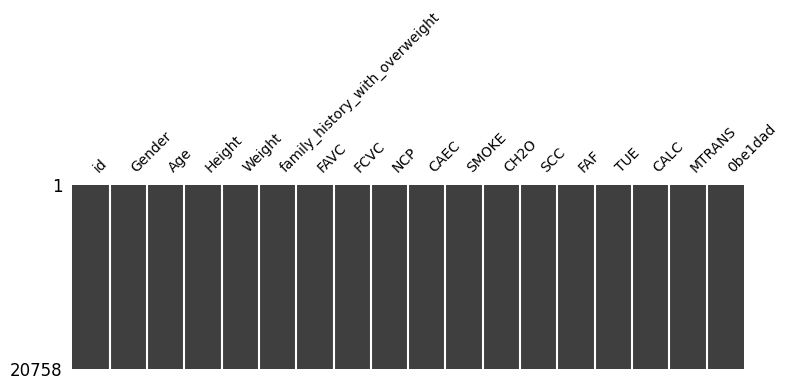

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

msno.matrix(df, ax=ax, sparkline=False, fontsize=10)
plt.tight_layout()
plt.show();

In [10]:
# Mostrar si hay valores ausentes
missing_values = df.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64


In [11]:
df.isnull().sum().sum()

0

In [12]:
# Eliminar filas con valores ausentes
df.dropna(inplace=True)

# Mostrar la cantidad de valores ausentes después de la eliminación
missing_values_after = df.isnull().sum()
print(f"Valores ausentes después de la eliminación:\n{missing_values_after}")

Valores ausentes después de la eliminación:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64


In [13]:
# Eliminar la columna id del DataFrame
df.drop(columns=["id"], inplace=True)

In [14]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

In [15]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    if df[column].dtype in ["int64", "float64"]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [16]:
# Variables continuas
continuous_vars = ["Age", "Height", "Weight"]

continuous_vars

['Age', 'Height', 'Weight']

In [17]:
# Mostrar la cantidad de outliers para cada columna continua
for column in continuous_vars:
    outliers_count = detect_outliers(df, column)
    print(f"{column}: {outliers_count} outliers")

Age: 1074 outliers
Height: 4 outliers
Weight: 0 outliers


In [18]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II
20757,Male,26.680376,1.816547,118.134898,1,1,3.000000,3.000000,Sometimes,0,2.003563,0,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [19]:
# Ver los elementos únicos de las variables
def unique_elements(df_analyze, vars):
    for var in vars:
        unique_values = df_analyze[var].unique()
        print(f"Valores únicos para {var}: {unique_values}")

In [20]:
# Lista de variables binarias
binary_vars = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

unique_elements(df, binary_vars)

Valores únicos para family_history_with_overweight: [1 0]
Valores únicos para FAVC: [1 0]
Valores únicos para SMOKE: [0 1]
Valores únicos para SCC: [0 1]


In [21]:
# Lista de variables nominales
nominal_vars = ["Gender", "CAEC", "CALC", "MTRANS", "0be1dad"]

unique_elements(df, nominal_vars)

Valores únicos para Gender: ['Male' 'Female']
Valores únicos para CAEC: ['Sometimes' 'Frequently' '0' 'Always']
Valores únicos para CALC: ['Sometimes' '0' 'Frequently']
Valores únicos para MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Valores únicos para 0be1dad: ['Overweight_Level_II' '0rmal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [22]:
# Encontramos datos incorrectos en algunas columnas y procedemos a modificarlos

# Valores únicos para CAEC: ['Sometimes' 'Frequently' '0' 'Always']
# Reemplazar '0' por 'No' en la columna 'CAEC'
df["CAEC"] = df["CAEC"].replace("0", "No")

# Valores únicos para CALC: ['Sometimes' '0' 'Frequently']
# Reemplazar '0' por 'I do not drink' en la columna 'CALC'
df["CALC"] = df["CALC"].replace("0", "I do not drink")

# Valores únicos para CALC: ['0rmal_Weight']
# Reemplazar '0rmal_Weight' por 'Normal_Weight' en la columna '0be1dad'
df["0be1dad"] = df["0be1dad"].replace("0rmal_Weight", "Normal_Weight")

In [23]:
# Chequeamos que estén todos correctos
unique_elements(df, nominal_vars)

Valores únicos para Gender: ['Male' 'Female']
Valores únicos para CAEC: ['Sometimes' 'Frequently' 'No' 'Always']
Valores únicos para CALC: ['Sometimes' 'I do not drink' 'Frequently']
Valores únicos para MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Valores únicos para 0be1dad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [24]:
# Chequear si hay datos repetidos
duplicated_rows = df[df.duplicated()]

# Mostrar las filas duplicadas, si existen
if not duplicated_rows.empty:
    print("Filas duplicadas encontradas:")
    print(duplicated_rows)
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


In [25]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [26]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in continuous_vars:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - Age
{'media': 23.841804418681953, 'desviacion_std': 5.688071958787075, 'mediana': 22.815416, 'varianza': 32.35416260833984, 'q1': 20.0, 'q3': 26.0, 'iqr': 6.0}


Datos estadisticos para variable - Height
{'media': 1.7002449351575297, 'desviacion_std': 0.08731190569718149, 'mediana': 1.7, 'varianza': 0.007623368876473514, 'q1': 1.631856, 'q3': 1.762887, 'iqr': 0.13103100000000012}


Datos estadisticos para variable - Weight
{'media': 87.88776840264958, 'desviacion_std': 26.379443076406236, 'mediana': 84.064875, 'varianza': 695.8750170213569, 'q1': 66.0, 'q3': 111.600553, 'iqr': 45.600553000000005}




### Análisis exploratorio descriptivo de cuatro variables

##### Elegiremos cuatro variables que sean importantes para la predicción del nivel de obesidad: Age, Height, Weight, y FAF.

In [27]:
selected_vars = ["Age", "Height", "Weight", "FAF"]

### Justificación de Variables

**Edad (Age)**:
- El metabolismo tiende a disminuir con la edad, lo que puede llevar a un aumento de peso si no se ajusta la ingesta calórica.
- Las responsabilidades y el estilo de vida cambian con la edad, afectando los hábitos alimenticios y de actividad física.

**Altura (Height)**:
- **Índice de Masa Corporal (IMC)**: El IMC se calcula como el peso dividido por el cuadrado de la altura. Es una medida estándar para determinar si una persona tiene un peso saludable, sobrepeso u obesidad.
- **Proporciones Corporales**: La altura puede influir en la distribución de la masa corporal.

**Peso (Weight)**:
- El peso es una medida directa de la cantidad total de masa corporal, que incluye grasa, músculo, hueso y otros componentes.
- **IMC**: Junto con la altura, el peso es fundamental para calcular el IMC, un indicador crítico para la obesidad.

**Frecuencia de Actividad Física (FAF)**:
- **Gasto Calórico**: La actividad física aumenta el gasto energético, ayudando a mantener un equilibrio calórico negativo o neutral.
- **Composición Corporal**: La actividad física puede aumentar la masa muscular y reducir la grasa corporal, mejorando la salud general y reduciendo el riesgo de obesidad.

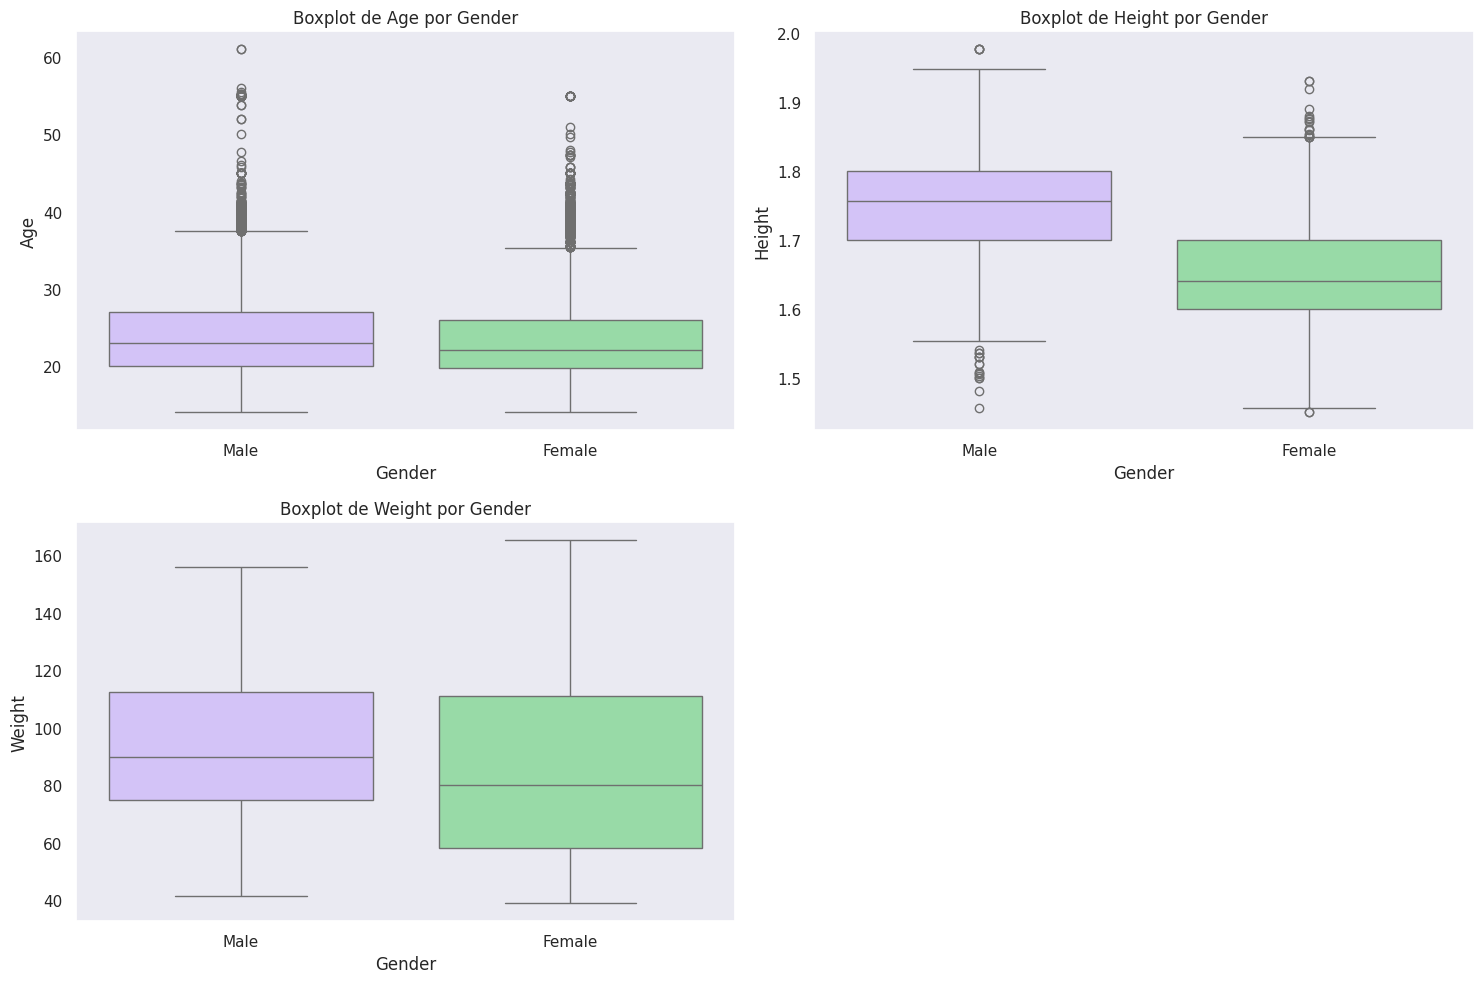

In [28]:
# Boxplots para variables continuas separadas por la variable objetivo 'target'
sns.set_theme(style="dark", palette="pastel")
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_vars, 1):
    if column != "FAF":
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, x="Gender", y=column, palette=["m", "g"], hue="Gender")
        plt.title(f"Boxplot de {column} por Gender")
plt.tight_layout()
plt.show()

### Observaciones por Género

**Edad**:
- Tanto hombres como mujeres tienen distribuciones de edad similares con varios outliers en edades mayores.
- Los hombres parecen tener una mayor variabilidad en la edad.

**Altura**:
- Los hombres tienden a ser más altos que las mujeres.
- Mayor variabilidad en la altura de los hombres en comparación con las mujeres.

**Peso**:
- Los pesos entre hombres y mujeres son similares en la mediana, pero las mujeres muestran una mayor variabilidad en el peso.

Text(0, 0.5, 'Frecuencia de Nivel de Obesidad')

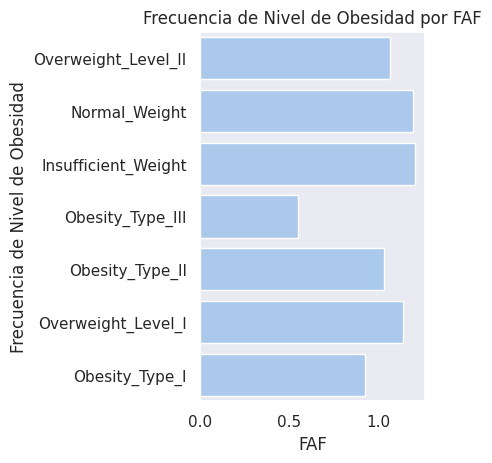

In [29]:
bar_palette = sns.color_palette("pastel")

# Barplot de FAF vs. 0be1dad
plt.subplot(1, 2, 2)
sns.barplot(
    x="FAF", y="0be1dad", data=df, orient="h", color=bar_palette[0], errorbar=None
)
plt.title("Frecuencia de Nivel de Obesidad por FAF")
plt.xlabel("FAF")
plt.ylabel("Frecuencia de Nivel de Obesidad")

### Análisis de Resultados

#### Distribución de la Frecuencia de Actividad Física:

La frecuencia de actividad física (FAF) se distribuye de manera similar entre varias categorías de nivel de obesidad, excepto para la categoría **Obesity_Type_III**, que tiene una frecuencia más baja.

#### Nivel de Obesidad:

Las categorías **Overweight_Level_II**, **Normal_Weight**, y **Insufficient_Weight** tienen frecuencias relativamente altas, sugiriendo una mayor prevalencia en el conjunto de datos.


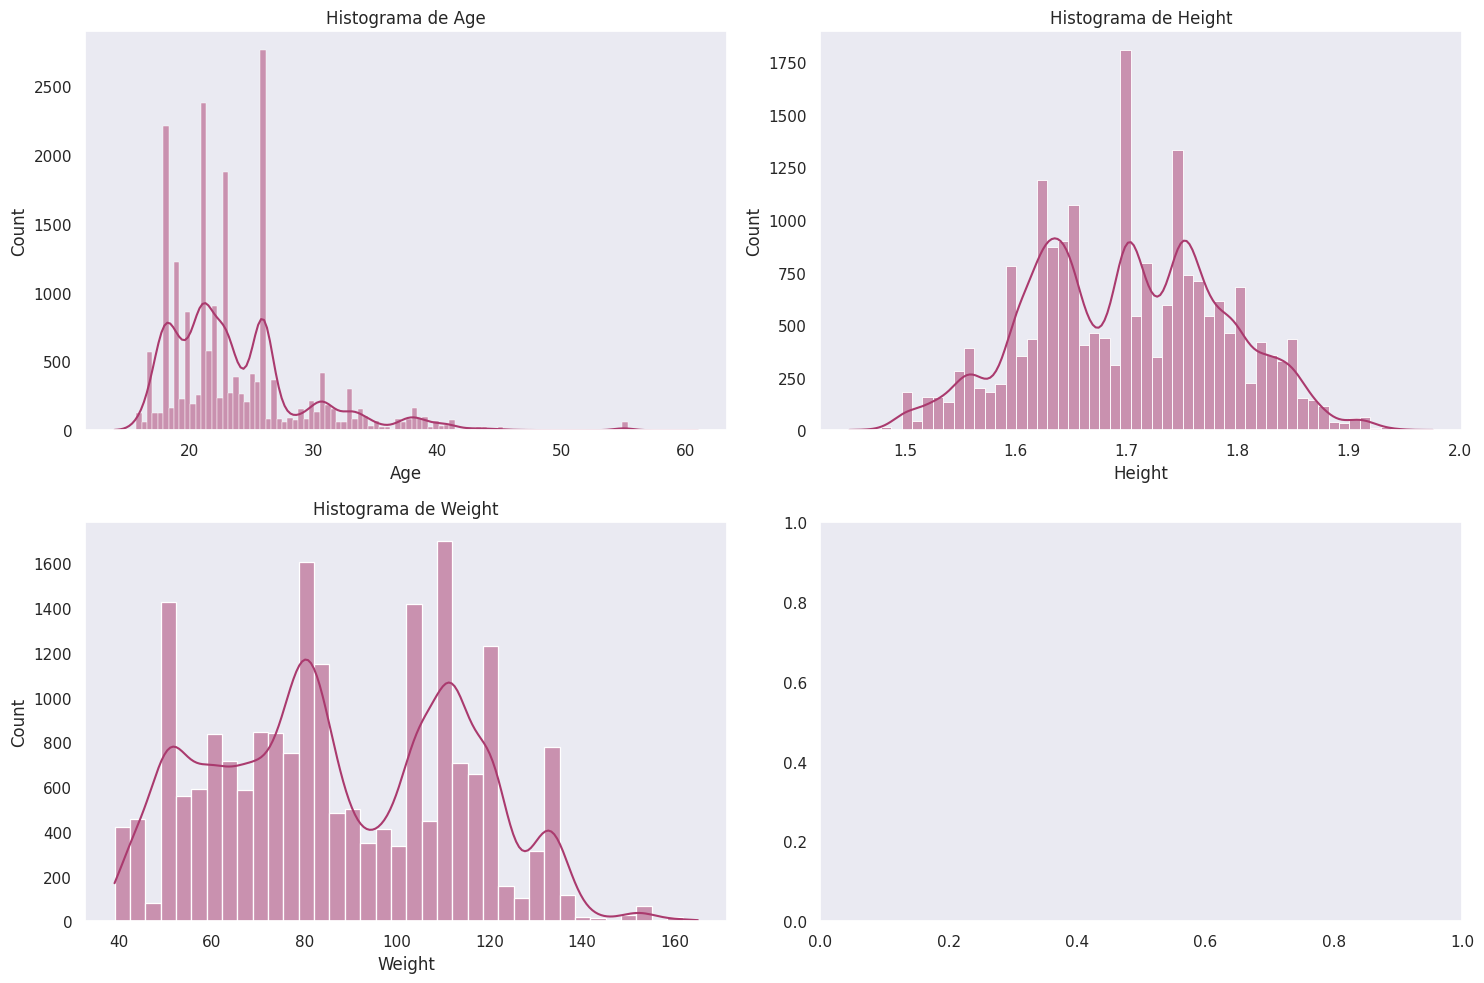

In [30]:
# Crear la figura y los ejes
num_columns = 2
num_rows = 2
fig, ax = plt.subplots(num_columns, num_rows, figsize=(15, 10))

sns.set_theme(style="darkgrid")

# Definir colores
hist_palette = sns.color_palette("flare", as_cmap=True)
bar_palette = sns.color_palette("pastel")

# Crear histogramas para cada variable seleccionada usando Seaborn
for i, column in enumerate(selected_vars):
    if column != "FAF":
        row = i // num_columns
        col_pos = i % num_columns
        sns.histplot(df[column], kde=True, ax=ax[row, col_pos], color=hist_palette(0.6))
        ax[row, col_pos].set_title(f"Histograma de {column}")

plt.tight_layout()
plt.show()

### Distribución de Variables

**Edad (Age)**:
- La distribución de la edad sugiere una población joven, con la mayoría de los individuos entre 18 y 30 años.
- La presencia de múltiples picos puede indicar diferentes subgrupos de edad dentro de la población.

**Altura (Height)**:
- La altura tiene una distribución relativamente simétrica con un pico alrededor de 1.7 metros.
- La variabilidad en la altura es menor en comparación con el peso.

**Peso (Weight)**:
- El peso muestra una gran variabilidad con varios picos, lo que indica diferencias significativas en la composición corporal de los individuos.
- La presencia de múltiples picos sugiere diferentes subgrupos en térmitividad física.


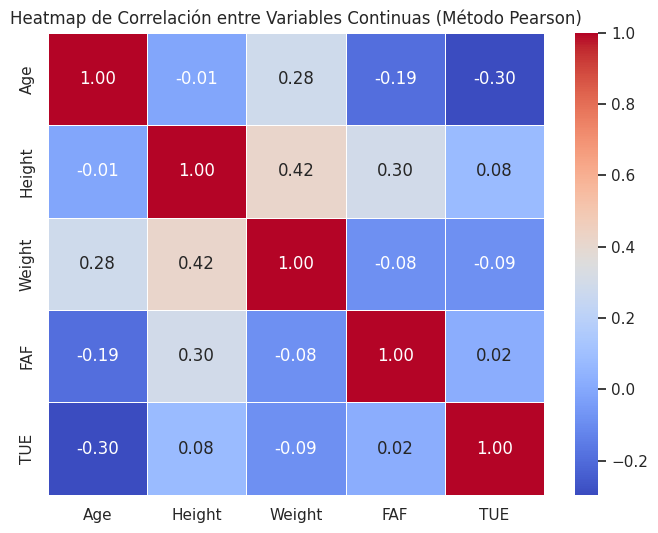

In [31]:
correlation_vars = selected_vars
correlation_vars.append("TUE")

# Calcular la matriz de correlación solo para las variables continuas usando el método de Pearson
correlation_matrix = df[correlation_vars].corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Continuas (Método Pearson)")
plt.show()

### Correlaciones entre Variables

**Edad (Age)**:
- La edad tiene una correlación positiva moderada con el peso, lo que indica que a medida que las personas envejecen, tienden a ganar peso.
- También tiene una correlación negativa moderada con el uso de tecnología, sugiriendo que las personas más jóvenes tienden a usar más tecnología.

**Altura (Height)**:
- La altura tiene una correlación positiva moderada con el peso y la frecuencia de actividad física, lo que podría indicar que las personas más altas tienden a ser más activas físicamente y a tener un peso mayor.

**Peso (Weight)**:
- El peso muestra correlaciones positivas moderadas con el consumo de agua y el número de comidas principales, sugiriendo que estos factores pueden estar relacionados con un mayor peso corporal.

**Actividad Física Frecuente (FAF)**:
- La actividad física tiene una correlación positiva moderada con la altura y una correlación negativa débil con la edad.

**Uso de Tecnología (TUE)**:
- El uso de tecnología tiene una correlación negativa moderada con la edad, lo que podría indicar que las personas más jóvenes usan más tecnología.


## Actividad 2

In [32]:
# Seleccionar las variables que se utilizarán para el entrenamiento
selected_variables = [
    "Gender",
    "Age",
    "Height",
    "Weight",
    "FAF",
    "family_history_with_overweight",
    "FAVC",
    "FCVC",
    "CH2O",
    "SCC",
    "0be1dad",
]

In [33]:
# Filtrar el DataFrame con las variables seleccionadas
df_train = df.loc[:, selected_variables]

df_train.head()

,Gender,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,0be1dad
0,Male,24.443011,1.699998,81.669950,0.000000,1,1,2.000000,2.763573,0,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,1.000000,1,1,2.000000,2.000000,0,Normal_Weight
2,Female,18.000000,1.711460,50.165754,0.866045,1,1,1.880534,1.910378,0,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1.467863,1,1,3.000000,1.674061,0,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1.967973,1,1,2.679664,1.979848,0,Overweight_Level_II


# Variables a Considerar para el Entrenamiento

- **Age (Edad)**: Es una variable continua y puede tener un impacto significativo en el nivel de obesidad. La relación entre la edad y la obesidad puede ser no lineal, pero es importante incluirla para capturar estas dinámicas.

- **Height (Altura)**: Otra variable continua que puede estar relacionada con el peso y, por lo tanto, con la obesidad. Normalmente, la altura se utiliza junto con el peso para calcular el IMC (Índice de Masa Corporal), que es una medida directa de la obesidad.

- **Weight (Peso)**: Es una variable crítica para determinar el nivel de obesidad. Directamente relacionada con la obesidad.

- **FAF (Frecuencia de Actividad Física)**: La frecuencia de la actividad física es una variable importante ya que está relacionada con el gasto calórico y puede influir en el peso y el nivel de obesidad.

- **family_history_with_overweight (Historia Familiar con Sobrepeso)**: La genética juega un papel en la predisposición a la obesidad, por lo que es una variable relevante.

- **FAVC (Frecuencia de Consumo de Alimentos Hipercalóricos)**: La dieta es un factor crítico en el peso y la obesidad. La frecuencia de consumo de alimentos hipercalóricos es una variable importante.

- **FCVC (Consumo de Vegetales Crudos)**: Esta variable refleja hábitos alimenticios saludables y puede estar inversamente relacionada con la obesidad.

- **Gender (Género)**: El género puede influir en la distribución del peso y la grasa corporal.

- **CH2O (Consumo de Agua)**: El consumo de agua puede estar relacionado con hábitos alimenticios y de salud en general.

- **SCC (Seguimiento de Consumo de Calorías)**: El seguimiento del consumo calórico puede indicar una mayor conciencia sobre la dieta y el control del peso.


In [34]:
# Transformar gender a valores numericos
"""
Gender: ["Male" "Female"]
"""
# Convertir las variables categóricas en variables dummy
df_train = pd.get_dummies(
    data=df_train,
    columns=["Gender"],
    drop_first=True,
    dtype="int",
)

df_train.head()

,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,0be1dad,Gender_Male
0,24.443011,1.699998,81.669950,0.000000,1,1,2.000000,2.763573,0,Overweight_Level_II,1
1,18.000000,1.560000,57.000000,1.000000,1,1,2.000000,2.000000,0,Normal_Weight,0
2,18.000000,1.711460,50.165754,0.866045,1,1,1.880534,1.910378,0,Insufficient_Weight,0
3,20.952737,1.710730,131.274851,1.467863,1,1,3.000000,1.674061,0,Obesity_Type_III,0
4,31.641081,1.914186,93.798055,1.967973,1,1,2.679664,1.979848,0,Overweight_Level_II,1


In [35]:
df_train.columns

Index(['Age', 'Height', 'Weight', 'FAF', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'CH2O', 'SCC', '0be1dad', 'Gender_Male'],
      dtype='object')

In [36]:
"""
0be1dad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']
"""

# Aplicar Label Encoder a la variable objetivo
label_encoder = LabelEncoder()
df_train["0be1dad"] = label_encoder.fit_transform(df_train["0be1dad"])

In [37]:
df_train.sample(5)

,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,0be1dad,Gender_Male
10709,22.038327,1.707968,95.269089,1.000000,1,1,2.000000,2.000000,0,2,1
8588,21.731497,1.722527,51.132809,1.067817,1,1,2.303656,1.873004,0,0,0
7724,35.000000,1.750000,98.000000,0.000000,1,1,2.000000,1.000000,0,2,1
5990,31.965402,1.850000,120.919703,1.171770,1,1,2.938616,1.147121,0,3,1
18281,20.924808,1.698626,103.026858,1.981154,1,1,2.000000,2.000000,0,2,1


In [38]:
df_train["0be1dad"].unique()

array([6, 1, 0, 4, 3, 5, 2])

In [39]:
df_train["Gender_Male"].unique()

array([1, 0])

In [40]:
label_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [41]:
# Separar características y variable objetivo
X = df_train.drop("0be1dad", axis=1)
y = df["0be1dad"]

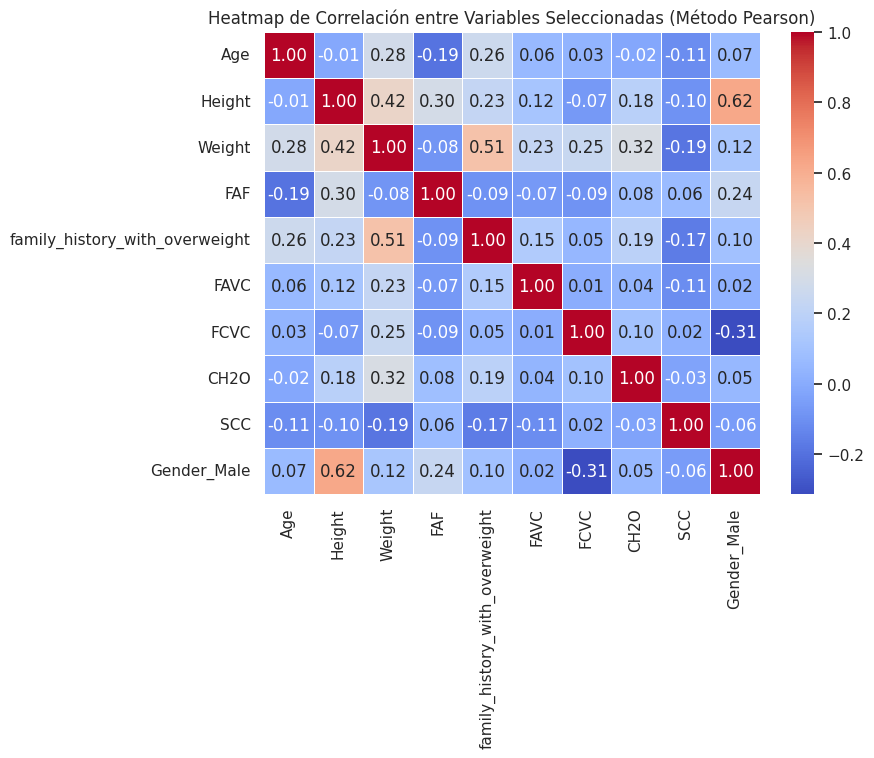

In [42]:
# Calcular la matriz de correlación solo para las variables continuas usando el método de Pearson
correlation_matrix = X.corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Seleccionadas (Método Pearson)")
plt.show()

### Correlaciones Significativas

- **Height (Altura) y Gender_Male (Género masculino)**: Correlación de 0.62, lo que indica que los hombres tienden a ser más altos.
- **Weight (Peso) y family_history_with_overweight (Historia familiar con sobrepeso)**: Correlación de 0.51, sugiriendo que las personas con una historia familiar de sobrepeso tienden a pesar más.
- **Weight y Height**: Correlación de 0.42, indicando que a medida que aumenta la altura, también tiende a aumentar el peso.
- **FAF (Frecuencia de Actividad Física)**: Correlación de -0.19, indicando que una mayor frecuencia de actividad física está asociada con niveles más bajos de obesidad.


In [43]:
# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (14530, 10)
Test: (6228, 10)


In [44]:
# Estandarizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrenar el modelo K-NN

In [45]:
# Calcular la matriz de distancias para el conjunto de entrenamiento utilizando la métrica del coseno
X_train_dist_cosine = distance.squareform(
    distance.pdist(X_train_scaled, metric="cosine")
)

X_train_dist_cosine

array([[0.00000000e+00, 1.34330902e+00, 1.26501919e+00, ...,
        1.35347673e+00, 1.44876786e+00, 1.53556521e+00],
       [1.34330902e+00, 0.00000000e+00, 5.15036686e-01, ...,
        6.86901703e-04, 1.20908126e+00, 1.00410527e+00],
       [1.26501919e+00, 5.15036686e-01, 0.00000000e+00, ...,
        5.00195088e-01, 1.10165006e+00, 6.13030504e-01],
       ...,
       [1.35347673e+00, 6.86901703e-04, 5.00195088e-01, ...,
        0.00000000e+00, 1.18656915e+00, 9.97743170e-01],
       [1.44876786e+00, 1.20908126e+00, 1.10165006e+00, ...,
        1.18656915e+00, 0.00000000e+00, 8.78855316e-01],
       [1.53556521e+00, 1.00410527e+00, 6.13030504e-01, ...,
        9.97743170e-01, 8.78855316e-01, 0.00000000e+00]])

In [46]:
# Calcular la matriz de distancias para el conjunto de prueba
X_test_dist_cosine = distance.cdist(X_test_scaled, X_train_scaled, metric="cosine")

X_test_dist_cosine

array([[1.22575082, 0.91037816, 1.21323519, ..., 0.91692212, 1.33508944,
        0.75430993],
       [1.5808492 , 1.17387443, 0.75702764, ..., 1.16035535, 0.63868528,
        0.10247038],
       [1.37411273, 0.00453634, 0.46617751, ..., 0.0025886 , 1.18968086,
        0.9604758 ],
       ...,
       [1.35453384, 0.00361257, 0.49053982, ..., 0.0050441 , 1.24674639,
        0.95534565],
       [1.30450988, 1.60562178, 1.01932236, ..., 1.59457338, 0.47739007,
        0.52810405],
       [0.96128992, 0.84459653, 0.42029848, ..., 0.85916354, 1.49284942,
        0.61214674]])

In [47]:
# Inicializar listas para almacenar los resultados
lst_accuracy_cosine = []
lst_neighbors = list(np.arange(3, 18, 2))

# Bucle para probar diferentes valores de k utilizando la métrica del coseno
for n_neighbors in lst_neighbors:
    knn_model_cosine = KNeighborsClassifier(
        n_neighbors=n_neighbors, metric="precomputed"
    )
    knn_model_cosine.fit(X_train_dist_cosine, y_train)
    y_pred_cosine = knn_model_cosine.predict(X_test_dist_cosine)
    lst_accuracy_cosine.append(accuracy_score(y_test, y_pred_cosine))

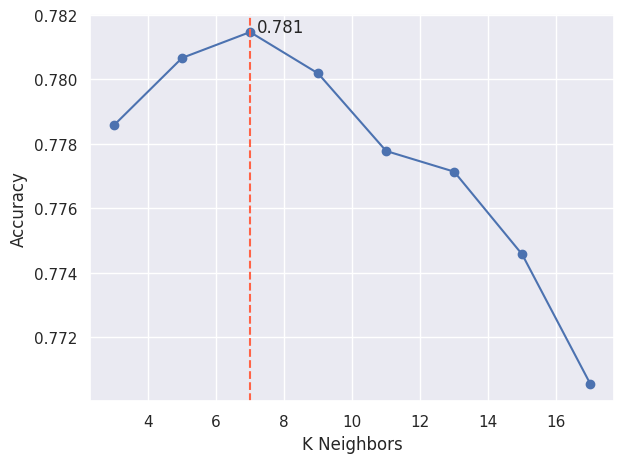

In [48]:
# Encontrar el valor óptimo de k
plt.plot(lst_neighbors, lst_accuracy_cosine, "o-")
idx_best_accuracy = np.argmax(lst_accuracy_cosine)
best_k_cosine = lst_neighbors[idx_best_accuracy]

plt.axvline(x=best_k_cosine, ls="--", color="tomato")
plt.text(
    best_k_cosine + 0.2,
    lst_accuracy_cosine[idx_best_accuracy],
    f"{np.round(lst_accuracy_cosine[idx_best_accuracy], 3)}",
)

plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

## Actividad 3

In [49]:
# Entrenar el modelo final con el mejor valor de k
knn_model_cosine = KNeighborsClassifier(n_neighbors=best_k_cosine, metric="precomputed")
knn_model_cosine.fit(X_train_dist_cosine, y_train)

y_pred_cosine = knn_model_cosine.predict(X_test_dist_cosine)
accuracy_score(y_test, y_pred_cosine)

0.781470777135517

In [50]:
# Evaluar el modelo en el conjunto de prueba
y_pred_cosine = knn_model_cosine.predict(X_test_dist_cosine)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)
print(f"Accuracy con k={best_k_cosine}: {accuracy_cosine}")
print(classification_report(y_test, y_pred_cosine))

Accuracy con k=7: 0.781470777135517
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.80      0.79       765
      Normal_Weight       0.61      0.72      0.66       908
     Obesity_Type_I       0.77      0.78      0.78       886
    Obesity_Type_II       0.93      0.94      0.93       953
   Obesity_Type_III       0.99      1.00      0.99      1235
 Overweight_Level_I       0.56      0.46      0.51       733
Overweight_Level_II       0.66      0.60      0.63       748

           accuracy                           0.78      6228
          macro avg       0.76      0.76      0.76      6228
       weighted avg       0.78      0.78      0.78      6228



In [51]:
X_train_dist_mahalanobis = distance.squareform(
    distance.pdist(X_train_scaled, metric="mahalanobis")
)
X_test_dist_mahalanobis = distance.cdist(
    X_test_scaled, X_train_scaled, metric="mahalanobis"
)

# Inicializar listas para almacenar los resultados
lst_accuracy_mahalanobis = []
lst_neighbors = list(np.arange(3, 18, 2))

# Bucle para probar diferentes valores de k
for n_neighbors in lst_neighbors:
    knn_model_mahalanobis = KNeighborsClassifier(
        n_neighbors=n_neighbors, metric="precomputed"
    )
    knn_model_mahalanobis.fit(X_train_dist_mahalanobis, y_train)
    y_pred_mahalanobis = knn_model_mahalanobis.predict(X_test_dist_mahalanobis)
    lst_accuracy_mahalanobis.append(accuracy_score(y_test, y_pred_mahalanobis))

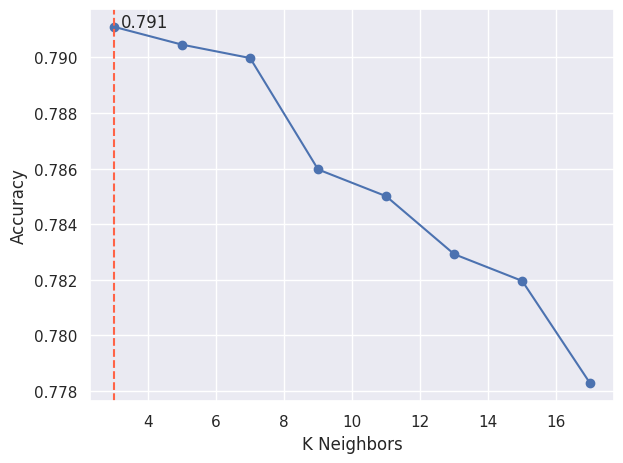

In [52]:
# Encontrar el valor óptimo de k
plt.plot(lst_neighbors, lst_accuracy_mahalanobis, "o-")
idx_best_accuracy = np.argmax(lst_accuracy_mahalanobis)
best_k_mahalanobis = lst_neighbors[idx_best_accuracy]

plt.axvline(x=best_k_mahalanobis, ls="--", color="tomato")
plt.text(
    best_k_mahalanobis + 0.2,
    lst_accuracy_mahalanobis[idx_best_accuracy],
    f"{np.round(lst_accuracy_mahalanobis[idx_best_accuracy], 3)}",
)

plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [53]:
# Entrenar el modelo final con el mejor valor de k
knn_model_mahalanobis = KNeighborsClassifier(
    n_neighbors=best_k_mahalanobis, metric="precomputed"
)
knn_model_mahalanobis.fit(X_train_dist_mahalanobis, y_train)

y_pred_mahalanobis = knn_model_mahalanobis.predict(X_test_dist_mahalanobis)
accuracy_score(y_test, y_pred_mahalanobis)

0.7911046885035324

In [54]:
# Evaluar el modelo en el conjunto de prueba
y_pred_mahalanobis = knn_model_mahalanobis.predict(X_test_dist_mahalanobis)
accuracy = accuracy_score(y_test, y_pred_mahalanobis)
print(f"Accuracy con k={best_k_mahalanobis}: {accuracy}")
print(classification_report(y_test, y_pred_mahalanobis))

Accuracy con k=3: 0.7911046885035324
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.82      0.80       765
      Normal_Weight       0.63      0.73      0.67       908
     Obesity_Type_I       0.77      0.79      0.78       886
    Obesity_Type_II       0.94      0.94      0.94       953
   Obesity_Type_III       0.99      1.00      0.99      1235
 Overweight_Level_I       0.60      0.50      0.55       733
Overweight_Level_II       0.67      0.60      0.63       748

           accuracy                           0.79      6228
          macro avg       0.77      0.77      0.77      6228
       weighted avg       0.79      0.79      0.79      6228



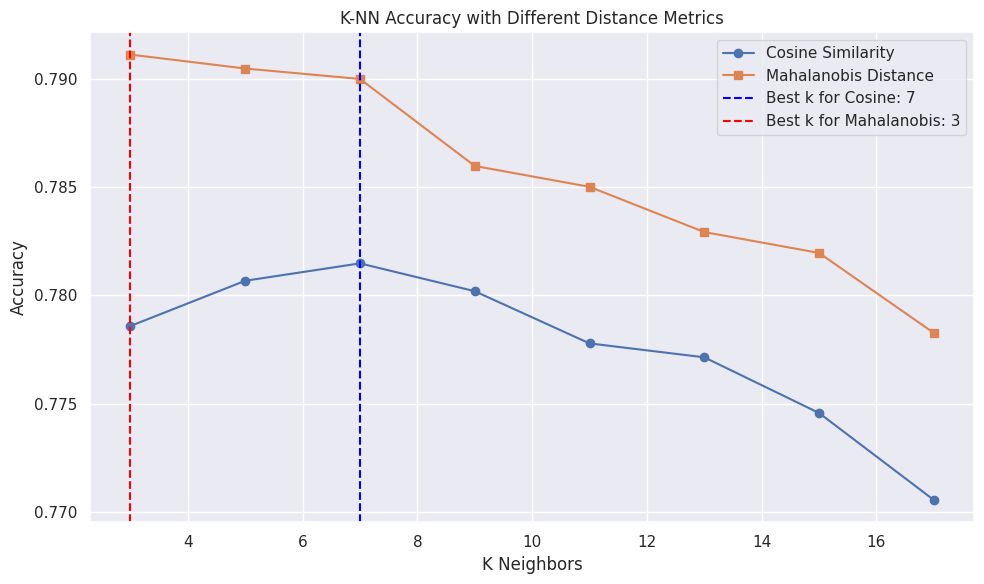

In [55]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(lst_neighbors, lst_accuracy_cosine, "o-", label="Cosine Similarity")
plt.plot(lst_neighbors, lst_accuracy_mahalanobis, "s-", label="Mahalanobis Distance")
plt.axvline(
    x=lst_neighbors[np.argmax(lst_accuracy_cosine)],
    ls="--",
    color="blue",
    label=f"Best k for Cosine: {lst_neighbors[np.argmax(lst_accuracy_cosine)]}",
)
plt.axvline(
    x=lst_neighbors[np.argmax(lst_accuracy_mahalanobis)],
    ls="--",
    color="red",
    label=f"Best k for Mahalanobis: {lst_neighbors[np.argmax(lst_accuracy_mahalanobis)]}",
)

plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy with Different Distance Metrics")
plt.legend()
plt.tight_layout()
plt.show()

### Conclusiones

**Similitud del Coseno**:
- Proporciona una precisión decente, pero es superada por la distancia de Mahalanobis.

**Distancia de Mahalanobis**:
- Mejora la precisión del modelo, probablemente debido a su capacidad para tener en cuenta la correlación entre las variables.

### Resumen de Resultados

**Similitud del Coseno**:
- **Mejor k**: 7
- **Precisión (Accuracy)**: 0.78147

**Distancia de Mahalanobis**:
- **Mejor k**: 3
- **Precisión (Accuracy)**: 0.7911

## Actividad 4

In [56]:
# Seleccionar las variables que se utilizarán para el entrenamiento
selected_variables = [
    "Gender",
    "Age",
    "Height",
    "Weight",
    "FAF",
    "family_history_with_overweight",
    "FAVC",
    "FCVC",
    "CH2O",
    "SCC",
    "0be1dad",
]

# Filtrar el DataFrame con las variables seleccionadas
df_train = df.loc[:, selected_variables]

df_train.head()

,Gender,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,0be1dad
0,Male,24.443011,1.699998,81.669950,0.000000,1,1,2.000000,2.763573,0,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,1.000000,1,1,2.000000,2.000000,0,Normal_Weight
2,Female,18.000000,1.711460,50.165754,0.866045,1,1,1.880534,1.910378,0,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1.467863,1,1,3.000000,1.674061,0,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1.967973,1,1,2.679664,1.979848,0,Overweight_Level_II


In [57]:
df_train.shape

(20758, 11)

In [58]:
df_train["0be1dad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [59]:
# Transformar la variable objetivo "0be1dad" a dos categorías
def transform_obesity_category(obesity_level):
    if obesity_level in ["Insufficient_Weight", "Normal_Weight"]:
        return "Underweight or Normal"
    else:
        return "Overweight or Obesity"


df_train["0be1dad"] = df_train["0be1dad"].apply(transform_obesity_category)

In [60]:
df_train["0be1dad"].unique()

array(['Overweight or Obesity', 'Underweight or Normal'], dtype=object)

In [61]:
# Transformar gender a valores numericos
"""
Gender: ["Male" "Female"]
"""
# Convertir las variables categóricas en variables dummy
df_train = pd.get_dummies(
    data=df_train,
    columns=["Gender"],
    drop_first=True,
    dtype="int",
)

df_train.head()

,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,0be1dad,Gender_Male
0,24.443011,1.699998,81.669950,0.000000,1,1,2.000000,2.763573,0,Overweight or Obesity,1
1,18.000000,1.560000,57.000000,1.000000,1,1,2.000000,2.000000,0,Underweight or Normal,0
2,18.000000,1.711460,50.165754,0.866045,1,1,1.880534,1.910378,0,Underweight or Normal,0
3,20.952737,1.710730,131.274851,1.467863,1,1,3.000000,1.674061,0,Overweight or Obesity,0
4,31.641081,1.914186,93.798055,1.967973,1,1,2.679664,1.979848,0,Overweight or Obesity,1


In [62]:
# Separar características y variable objetivo
X = df_train.drop(columns=["0be1dad"])
y = df_train["0be1dad"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [63]:
X_train.head()

,Age,Height,Weight,FAF,family_history_with_overweight,FAVC,FCVC,CH2O,SCC,Gender_Male
20695,24.000000,1.700000,84.000000,1.000000,1,1,2.000000,2.000000,0,1
10630,26.000000,1.632193,105.037463,0.000000,1,1,3.000000,2.523793,0,0
9239,25.996716,1.623938,105.036522,0.019404,1,1,3.000000,2.419153,0,0
3555,29.620095,1.889104,129.157346,1.072318,1,1,2.239634,1.032834,0,1
3613,21.000000,1.620000,68.000000,1.000000,1,1,2.000000,2.000000,0,0


In [64]:
# Modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
intercept = model.intercept_
lst_coef = model.coef_.ravel()

print(model.feature_names_in_)
print(lst_coef)
print(f"intercepto: {intercept}")

['Age' 'Height' 'Weight' 'FAF' 'family_history_with_overweight' 'FAVC'
 'FCVC' 'CH2O' 'SCC' 'Gender_Male']
[-0.06632481 12.84463683 -0.35711156  0.30477509  0.11949137 -0.06883369
  0.65280195 -0.41892321 -0.95089586  1.51341849]
intercepto: [2.53446192]


In [66]:
# Calcular los ODD Ratios
odds_ratios = np.exp(model.coef_[0])
features_odds_ratios = pd.Series(odds_ratios, index=X.columns).sort_values(
    ascending=False
)

print("\nODD Ratios de las variables:")
print(features_odds_ratios)


ODD Ratios de las variables:
Height                            378751.966312
Gender_Male                            4.542232
FCVC                                   1.920916
FAF                                    1.356320
family_history_with_overweight         1.126924
Age                                    0.935827
FAVC                                   0.933482
Weight                                 0.699694
CH2O                                   0.657755
SCC                                    0.386395
dtype: float64


In [67]:
# Identificar las dos variables más importantes en términos de ODD Ratio
top_2_features = features_odds_ratios.head(2)
print("\nLas dos variables más importantes en términos de ODD Ratio:")
print(top_2_features)


Las dos variables más importantes en términos de ODD Ratio:
Height         378751.966312
Gender_Male         4.542232
dtype: float64


### Resumen de las Dos Variables Más Importantes en Términos de ODD Ratio

- **Height (ODD Ratio = 378751.966312)**:
  Un aumento en la altura está fuertemente asociado con un incremento en las odds de ser "Overweight or Obesity". Esto sugiere una relación muy fuerte y posiblemente necesita ser revisado por escalamiento o presencia de valores atípicos.

- **Gender_Male (ODD Ratio = 4.542232)**:
  Ser hombre aumenta significativamente las odds de ser "Overweight or Obesity", indicando que el género es una variable importante en la predicción del sobrepeso y obesidad.


In [68]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9697854327835352

Classification Report:
                       precision    recall  f1-score   support

Overweight or Obesity       0.97      0.98      0.98      4981
Underweight or Normal       0.96      0.93      0.94      1870

             accuracy                           0.97      6851
            macro avg       0.97      0.96      0.96      6851
         weighted avg       0.97      0.97      0.97      6851


Confusion Matrix:
[[4905   76]
 [ 131 1739]]


### Precisión del Modelo

El modelo tiene una precisión del 96.98%, lo que indica que el modelo predice correctamente el 96.98% de las veces.

### Desempeño del Modelo

- **Casos de "Overweight or Obesity"**:
  - Predicciones correctas: 4905
  - Predicciones incorrectas: 76

- **Casos de "Underweight or Normal"**:
  - Predicciones correctas: 1739
  - Predicciones incorrectas: 131


In [69]:
# Número de pruebas manuales a realizar
num_samples = 5

# Seleccionar índices aleatorios del conjunto de prueba
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("\nPruebas Manuales:")
for idx in random_indices:
    print(f"Observación {idx}:")
    print(f"Predicción esperada : {y_test.iloc[idx]}")
    print(f"Predicción del modelo: {y_pred[idx]}")
    print("---")


Pruebas Manuales:
Observación 3728:
Predicción esperada : Underweight or Normal
Predicción del modelo: Underweight or Normal
---
Observación 5911:
Predicción esperada : Underweight or Normal
Predicción del modelo: Underweight or Normal
---
Observación 3849:
Predicción esperada : Underweight or Normal
Predicción del modelo: Underweight or Normal
---
Observación 1201:
Predicción esperada : Overweight or Obesity
Predicción del modelo: Overweight or Obesity
---
Observación 5966:
Predicción esperada : Overweight or Obesity
Predicción del modelo: Overweight or Obesity
---
